In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('houses_to_rent_brazil_kaggle.csv')
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [3]:
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [5]:
df.isna().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [6]:
df.groupby(['city'])['rent amount (R$)'].mean()

city
Belo Horizonte    3664.127981
Campinas          2364.290739
Porto Alegre      2337.699916
Rio de Janeiro    3232.904064
São Paulo         4652.793783
Name: rent amount (R$), dtype: float64

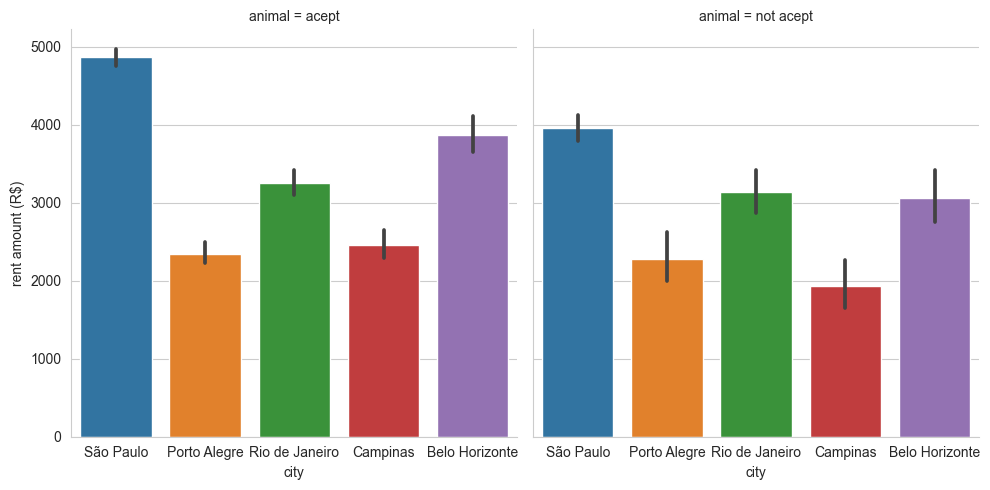

In [7]:
sns.catplot(x = 'city', y = 'rent amount (R$)', col='animal', data=df, kind='bar')

In [8]:
AceptAnimal = sum(df['animal'] == 'acept')
NotAceptAnimal = sum(df['animal'] == 'not acept')
print(f"Number of acept : {AceptAnimal}, Number of not acept : {NotAceptAnimal}")

Number of acept : 8316, Number of not acept : 2376


In [9]:
df['floor'] = df['floor'].replace('-',0)

In [10]:
df['floor'] = df['floor'].astype(int)

In [11]:
le = LabelEncoder()

df['animal'] = le.fit_transform(df['animal'])
df['city'] = le.fit_transform(df['city'])
df['furniture'] = le.fit_transform(df['furniture'])

df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,4,70,2,1,1,7,0,0,2065,3300,211,42,5618
1,4,320,4,4,0,20,0,1,1200,4960,1750,63,7973
2,2,80,1,1,1,6,0,1,1000,2800,0,41,3841
3,2,51,2,1,0,2,0,1,270,1112,22,17,1421
4,4,25,1,1,0,1,1,1,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,2,63,2,1,1,5,1,0,402,1478,24,22,1926
10688,4,285,4,4,4,17,0,1,3100,15000,973,191,19260
10689,3,70,3,3,0,8,1,0,980,6000,332,78,7390
10690,3,120,2,2,2,8,0,0,1585,12000,279,155,14020


In [12]:
targets = df['rent amount (R$)']
df = df.drop(columns= ['rent amount (R$)', 'total (R$)'])

x_train, x_test, y_train, y_test = train_test_split(df, targets, test_size=0.3, random_state=42)

In [13]:
lr = LinearRegression()
lr.fit(df, targets)
kf = KFold(n_splits=5, shuffle=True, random_state=42) 
cross_val_scores = cross_val_score(lr, x_train, y_train, cv=kf, scoring='r2')
print("Cross-validation scores:", cross_val_scores)
print("Mean R^2:", cross_val_scores.mean())

Cross-validation scores: [0.97679262 0.87501002 0.98242793 0.98091467 0.98136817]
Mean R^2: 0.959302682290901


In [14]:
# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)
print("Mean R^2:", cross_val_scores.mean())

# Calculate the mean squared error (MSE) on the test set
mse = cross_val_scores.mean()  # Negative R^2 is equivalent to MSE

# Print the MSE
print("Mean Squared Error (MSE) on the test set:", mse)

Cross-validation scores: [0.97679262 0.87501002 0.98242793 0.98091467 0.98136817]
Mean R^2: 0.959302682290901
Mean Squared Error (MSE) on the test set: 0.959302682290901


In [15]:
# Save column names  
original_cols = x_train.columns

new_data = pd.DataFrame([[4, 100, 2, 1, 2, 2, 0, 0, 1000, 500, 40]], 
                         columns=original_cols)

predicted_rent = lr.predict(new_data)
print("Predicted Rent:", predicted_rent[0])

Predicted Rent: 2978.3654581863307
